### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.

#### _What is Stroop Effect_ ? 
In psychology, the _Stroop effect_ is a demonstration of interference in the reaction time of a task. When the name of a color (e.g., "blue", "green", or "red") is printed in a color that is not denoted by the name (e.g., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop, who first published the effect in English in 1935. *Source*: [Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect)

#### (1) What is the independent variable? What is the dependent variable?

**Independent Variables**:
 *Text Color* and *Color Name* are the main independent variables. They are sometimes same (for Congruent words condition) or different (Incongruent words condition).<br>
**Dependent Variables**:
 _Reaction time of participants_, i.e the amount of time it takes for the participant to indicate the color.

#### (2) What is an appropriate set of hypotheses for this task? 
    What kind of statistical test do you expect to perform? Justify your choices.

$$H_0: RT_{congruent} \geq RT_{incongruent}$$ 
$$H_1: RT_{incongruent} \geq RT_{congruent}$$
* $\mu_{1}$ =  the average time spent by a participant in the congruent test group.
* $\mu_{2}$ =  the average time spent by a participant in the incongruent test group. <br>

**Null Hypothesis** ($H_{0}$): Reaction time for both (congruent and incongruent) conditions are the same or reaction time for congruent condition is faster than incongruent condition. $\mu_{1} - \mu_{2} \geq 0 $ i.e, the time duration for the incongruent condition would be less or equal to the time duration for the congruent condition for the same population. <br>
**Alternative Hypothesis:**  ($H_{1}$): There is a noticable increase in reaction time in the incongruent conditions compared to the congruent condition. <br> 
    $\mu_{1} - \mu_{2} < 0 $, i.e, the time duration for the incongruent condition would be greater than the time duration for the congruent condition for the same population. 

##### Recommended Statistical Test 
The _t- test_ would be an appropriate statistical test to investigate the Stroop Effect, considering that we have means of two different data, congruent and incongruent condition, the population mean is not known and also that the sample size of our data is small. The *Dependent t-test for paired samples* would be appropriate for this scenario, as here we have only one sample (group of 24 participants) that has been tested twice (for the congurent and incongruent condition).

#### (3) Report some descriptive statistics regarding this dataset.
Include at least one measure of **central tendency** and at least one **measure of variability** . The name of the data file is _stroopdata.csv_

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [46]:
df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [47]:
df.shape

(24, 2)

In [48]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Central Tendency

In [49]:
print('Median Performance in Congruent Condition:',df.Congruent.median(),'seconds')

Median Performance in Congruent Condition: 14.3565 seconds


In [50]:
print('Median Performance in InCongruent Condition:',df.Incongruent.median(),'seconds')

Median Performance in InCongruent Condition: 21.0175 seconds


* $\bar X_{c}$ (Mean of the congruent condition) = 14.05
* $\bar X_{ic}$ (Mean for the incongruent condition) = 22.015
* $M_{c}$ (Median of the congruent condition) = 14.3565
* $M_{ic}$ (Median for the incongruent condition) = 21.0175<br>
It does not make much sense to report _Mode_ of the performance scores as every participant score is having a unique time duration.

#### Measures of Variability

The **InterQuartileRange (IQR)** also called the _middle 50%_ or _H-Spread_ is a measure of statistical dispersion gives the difference between the 25th and 75th percentile (or) upper and lower quartile of the data distribution. IQR = Q3 - Q1. <br>
* $C_{Q1} = 11.89,   IC_{Q1} = 18.71$
* $C_{Q3} = 16.20,   IC_{Q3} = 24.05$

After finding the values of the first and third quartile we can determine the inner quartile range
(IQR) for each data set.
* $IQR_{C} = 4.31$ ( IQR for Congruent Condition )
* $IQR_{IC} = 7.85$ ( IQR for Incongruent Condition )

From ```df.describe()``` we see that the:
* $SD_{C}$ = 3.559 (Standard Deviation of performance for Congruent Condition)
* $SD_{IC}$ = 4.797 (Standard Deviation of performance for Incongruent Condition)

#### (4) Provide one or two visualizations that show the distribution of the sample data. 
    Write one or two sentences noting what you observe about the plot or plots.

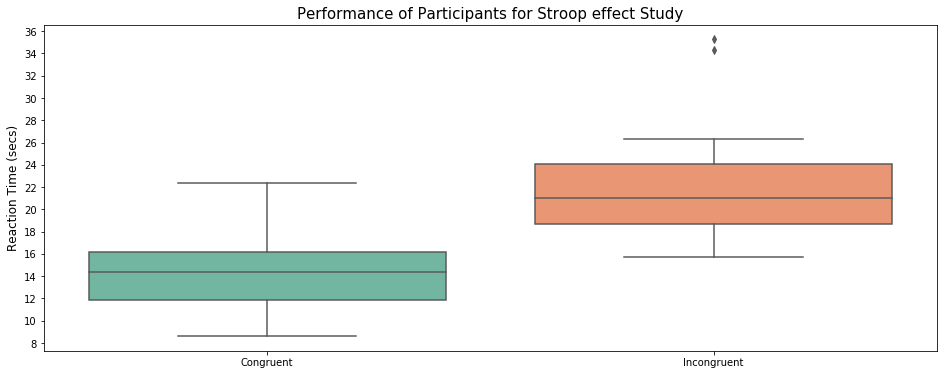

In [51]:
import matplotlib.ticker as plticker
## Box Plot of dataset
fig = plt.figure(figsize=(16,6))
ax = sns.boxplot(data=df, orient="v", palette="Set2")
loc = plticker.MultipleLocator(base=2.0) ## To put ticks at regular intervals of 2 units
ax.yaxis.set_major_locator(loc) 
plt.ylabel('Reaction Time (secs)',fontsize = 12);
plt.title('Performance of Participants for Stroop effect Study',fontsize = 15);

A **BoxPlot** gives us a graphical representation of the range of each set of data at a glance. It shows the median, the IQR range and also any outliers in the dataset. In the data we see that there is a significant increase in Reaction Time from the congruent test versus the incongruent test as 75% of the data in the incongruent test is above the IQR of the congruent test. That being said about 25% of the data in the congruent test overlaps with the lower quartile of the Incongruent tests when considering all data. We also see two outliers in the incongruent condition taking more than 33 secs. But on the whole, the data leads us to believe that incongruent tests will take longer to finish than the congruent test.

Text(0.5,0,'Reaction Time (secs)')

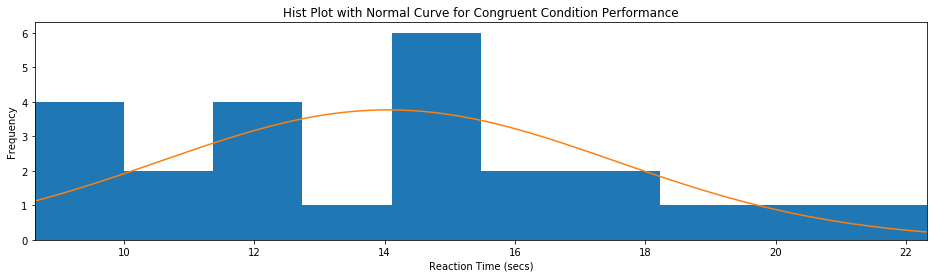

In [52]:
## Hist Plot with Normal Curve for Congruent dataset
plt.figure(figsize=(16,4))
#Conguent Condition Plot
arr_c = df.Congruent.tolist()
result = plt.hist(arr_c)
plt.xlim(min(arr_c),max(arr_c))
## Normalizing Hist plot to match with Distribution plot
mean = np.mean(arr_c)
variance = np.var(arr_c)
sigma = np.sqrt(variance)
x = np.linspace(min(arr_c), max(arr_c), 100)
dx = result[1][1] - result[1][0]
scale = len(arr_c)*dx
plt.plot(x, mlab.normpdf(x, mean, sigma)*scale)
plt.title('Hist Plot with Normal Curve for Congruent Condition Performance')
plt.ylabel('Frequency')
plt.xlabel('Reaction Time (secs)')

Text(0.5,0,'Reaction Time (secs)')

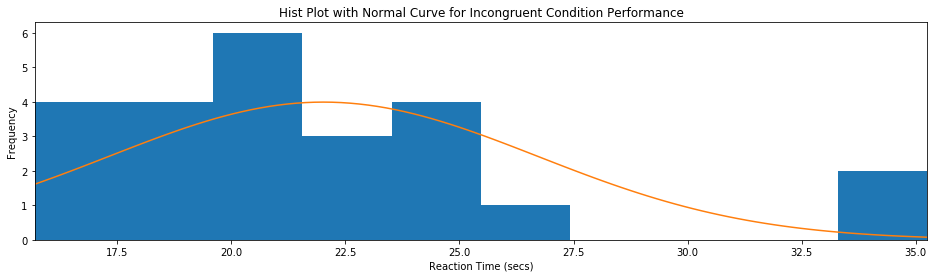

In [53]:
## Hist Plot with Normal Curve for InCongruent dataset
plt.figure(figsize=(16,4))
#Inconguent Condition Plot
arr_ic = df.Incongruent.tolist()
result = plt.hist(arr_ic)
plt.xlim(min(arr_ic),max(arr_ic))
## Normalizing Hist plot to match with Distribution plot
mean = np.mean(arr_ic)
variance = np.var(arr_ic)
sigma = np.sqrt(variance)
x = np.linspace(min(arr_ic), max(arr_ic), 100)
dx = result[1][1] - result[1][0]
scale = len(arr_ic)*dx
plt.plot(x, mlab.normpdf(x, mean, sigma)*scale)
plt.title('Hist Plot with Normal Curve for Incongruent Condition Performance')
plt.ylabel('Frequency')
plt.xlabel('Reaction Time (secs)')

Another means to visualize the data can be done through a Kernel Density Estimation Plot which gives the probability density function in y-axis for the occurence of a particular data in the x-axis.  We can also use a histogram and normalized curve combination which categorizes the data into frequencies to see how the data falls proportionally within ranges and gives us an approximation of the shape of the data’s distribution.

[Text(0,0.5,'Kernel Density'),
 Text(0.5,0,'ReactionTime in (secs)'),
 Text(0.5,1,'KDE Plot of performance in InCongruent Condition')]

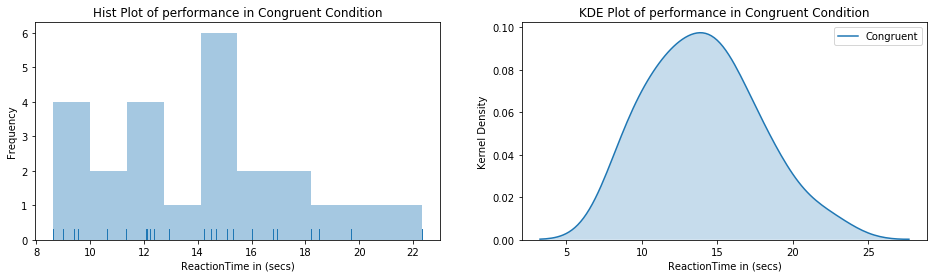

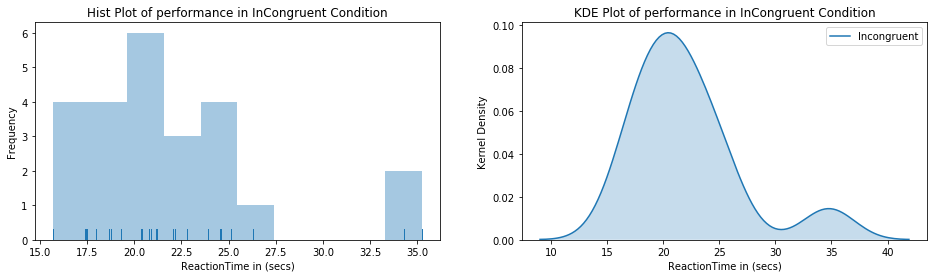

In [54]:
## Histogram and Density Plot of Congruent Condition Dataset.
fig, (ax1,ax2) = plt.subplots(figsize=(16,4),ncols=2)
ax = sns.distplot(df.Congruent,bins = 10,kde = False, rug=True, ax = ax1)
ax.set(xlabel='ReactionTime in (secs)', ylabel='Frequency',title = 'Hist Plot of performance in Congruent Condition')
ax = sns.kdeplot(df.Congruent, shade=True, ax = ax2);
ax.set(xlabel='ReactionTime in (secs)', ylabel='Kernel Density',title = 'KDE Plot of performance in Congruent Condition')
fig, (ax3,ax4) = plt.subplots(figsize=(16,4),ncols=2)
ax = sns.distplot(df.Incongruent,bins = 10,kde = False, rug=True, ax = ax3)
ax.set(xlabel='ReactionTime in (secs)', ylabel='Frequency',title = 'Hist Plot of performance in InCongruent Condition')
ax = sns.kdeplot(df.Incongruent, shade=True, ax = ax4);
ax.set(xlabel='ReactionTime in (secs)', ylabel='Kernel Density',title = 'KDE Plot of performance in InCongruent Condition')

The hist and distribution plot for _Incongruent Condition_ shows a firmly right-skewed data distribution, whereas for the _Congruent Condition_ the data is closer to a normal (Gaussian) distrubition curve. There are more reaction time scores in the 14 - 16 seconds range in the Congruent Condition and for the Incongruent Condition we see more scores in the 20 - 22 seconds range

#### (5) Now, perform the statistical test and report the results. 
    What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it?
    Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [55]:
np.random.seed(12345678) # fix random seed to get same numbers

In [56]:
## Running a Dependent t-test for paired samples
paired_sample = stats.ttest_rel(arr_ic, arr_c)
print ("The t-statistic is %.3f and the p-value is %.3f." % paired_sample)

The t-statistic is 8.021 and the p-value is 0.000.


A large t-statistic score of 8.021 indicates that there is indeed a significant different in performance between the two test conditions. Now that we have the t-statistic we can compare it to the T-critical value to determine if the NULL Hypothesis ($H_{0}$) should be accepted or rejected. Since we have 
* **N = 24** (No. of Participants in both Congruent and Incongruent conditions)
* So, (*degrees of Freedom*) **df** = N - 1 = 23  

 From the t-test [look up table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf), we can find that for **df = 23** and for 99.50% Confidence Interval and Type-I error rate ( $\alpha$ = 0.005), the critical t-value is +/- 2.807
Since our computed t-statistic value of 8.021 is larger than the critical value and smaller the p-value which is less the threshold 0.01 (for 99% confidence interval), we can **reject the NULL Hypothesis ($H_{0}$)**

The t-test confirms what was expected from the above plots, that the reaction time in incongruent test condition would normally take longer than the reaction time for congruent condition as congruent test linked both visual colors with the correct printed name of the color, while incongruent required to try to separate the visual color and the name of the color which
required a bit more processing time by the human time to do. 

#### 6.) Optional: What do you think is responsible for the effects observed?
    Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The Stroop effect (sometimes called the Stroop test) is an outcome of our mental (attentional) vitality and flexibility. Current research on the Stroop effect emphasizes the interference that automatic processing of words has on the more mentally effortful task of just naming the ink color. Thus it takes longer time for people to read the word and then match the color (in incongruent condition) then simply reading out the color by visual inference (as in congruent condition).

Numerous studies and research has been done on the Stroop Effect since J.R.Stroop first published his landmark article on attention and interference, in 1935. One related study is _The Numerical Stroop Effect_ which demonstrates the close relationship between numerical values and physical sizes. Here Digits symbolize numerical values but they also have physical sizes. In this case the 
* Dependent (response) variable is _Reaction time of participants_ to identify the correct digit, and
* Independent  (predictor) variables are the _Size of the digit_ and _the digit_ itself.

#### References

* [Wikipedia - Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)
* [Wikipedia - Dependent t-test for Paired Samples](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)
* [Towards Data Science - Inferential Stats - t-test using numpy](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)
* [Seas.umich.edu - Stroop Effect](http://seas.umich.edu/eplab/demos/st0/stroopdesc.html)
* [Half a Century of Research on the Stroop Effect: An Integrative Review](http://melaniestefan.net/MacLeod1991.pdf)